In [177]:
import numpy as np
import matplotlib.pyplot as plt
import eleanor
import lightkurve as lk
import copy
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [178]:
star = eleanor.Source(tic=38846515, sector=1)
star.coords

INFO: Found cached file /Users/adityasengupta/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file /Users/adityasengupta/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file /Users/adityasengupta/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1_tess_v2_pm.txt with expected size 237847. [astroquery.query]


[68.9597092399964, -64.0270368810381]

In [179]:
data = eleanor.TargetData(star, do_psf=False)

AttributeError: &#39;TargetData&#39; object has no attribute &#39;tpf_flux_bkg&#39;

In [ ]:
xlow, ylow = data.post_obj.origin_xy
xhi, yhi = int(xlow + 2 * (data.post_obj.center_xy[0] - xlow)), int(ylow + 2 * (data.post_obj.center_xy[1] - ylow))
print("x from {0} to {1}, y from {2} to {3}".format(xlow, xhi, ylow, yhi))
stars = data.post_obj.find_sources()

In [181]:
stars

,TessID,RA,Dec,pmRA,pmDEC,Tmag
0,38841792,68.558283,-63.886256,-2.90912,-0.265668,16.1040
1,684912386,68.560111,-63.874810,1.69911,-0.611805,18.5949
2,38841787,68.570567,-63.875492,15.72910,78.924000,15.4099
3,684912357,68.577845,-63.874576,-2.57145,-1.877440,20.4605
4,684912385,68.545884,-63.890748,-1.43612,10.958200,19.6770
...,...,...,...,...,...,...
7542,38815512,68.039092,-63.439139,4.66754,2.192860,16.1334
7543,684911463,69.203227,-64.295718,2.01487,-0.142447,18.2887
7544,38810864,67.593121,-63.624187,7.38296,-5.862160,16.0585
7545,684914245,67.428310,-63.854982,8.31503,15.859500,20.0738


In [182]:
stars[stars.TessID == str(star.tic)]

,TessID,RA,Dec,pmRA,pmDEC,Tmag
1544,38846515,68.959709,-64.027037,10.8454,-0.49937,10.3157


In [183]:
stars_in_tpf = data.get_stars_in_tpf(star.coords, 13, 13)
stars_in_tpf[stars_in_tpf.Tmag < 14]

,TessID,RA,Dec,pmRA,pmDEC,Tmag
0,38846515,68.959709,-64.027037,10.84540,-0.49937,10.3157
2,38846512,68.945978,-64.022280,8.14714,26.35560,13.1363
14,38846504,68.963233,-64.006145,7.92468,8.90396,12.9216
17,38846503,68.939520,-64.005761,3.28755,13.52180,12.0136
90,38846491,68.952828,-63.970086,14.39570,23.22610,13.5701
176,38846531,68.865484,-64.095782,6.00000,9.30000,11.1547
192,38875457,68.987121,-64.108243,2.34998,-1.54025,13.8676
196,38875458,68.935756,-64.109406,-7.07459,-69.31510,10.2372
212,38846533,69.079291,-64.095999,8.46987,-16.72940,11.5132
284,38877066,69.100678,-64.101622,-2.84573,-13.69770,10.8667


In [206]:
i = 1
xy = np.array(WCS(data.post_obj.header, naxis=2).all_world2pix(stars_in_tpf.RA, stars_in_tpf.Dec, 1)).T
print(np.max(xy - np.array([data.cen_x, data.cen_y])))
pxcoords = eleanor.use_pointing_model(np.array(xy).T[i], data.pointing_model[100])[0][:2]
around = 3
low_x, high_x = int(pxcoords[1]) - 3, int(pxcoords[1]) + 3
low_y, high_y = int(pxcoords[0]) - 3, int(pxcoords[0]) + 3
print(pxcoords)
print(data.cen_x, data.cen_y)


22.792187882768246
[68.51993174 68.39631757]
109 69


In [211]:
xl, xu, yl, yu, mx, my = data.get_tpf_coords(star.coords, 13, 13, 13, star)
print(xl, xu)

103 116


In [226]:
relcoords = xy - np.array([xl, yl])
from functools import reduce
keep_stars = reduce(np.bitwise_and, [relcoords[:,0] >= 0.0, relcoords[:,0] <= 13.0, relcoords[:,1] >= 0.0, relcoords[:,1] <= 13.0])
stars_to_keep = stars_in_tpf[keep_stars]
stars_to_keep[stars_to_keep.Tmag <= 14]

,TessID,RA,Dec,pmRA,pmDEC,Tmag
0,38846515,68.959709,-64.027037,10.84540,-0.49937,10.3157
2,38846512,68.945978,-64.022280,8.14714,26.35560,13.1363
14,38846504,68.963233,-64.006145,7.92468,8.90396,12.9216
17,38846503,68.939520,-64.005761,3.28755,13.52180,12.0136


In [228]:
data.get_stars_in_tpf(star.coords, 13, 13)

TypeError: unsupported operand type(s) for /: &#39;NoneType&#39; and &#39;float&#39;

&lt;matplotlib.image.AxesImage at 0x7fc6670bf520&gt;

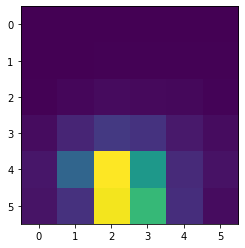

In [185]:
plt.imshow(np.mean(data.post_obj.flux, axis=0)[low_x:high_x, low_y:high_y])

&lt;matplotlib.image.AxesImage at 0x7fc667046e20&gt;

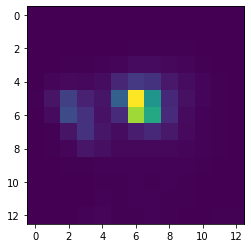

In [186]:
plt.imshow(data.tpf[0])

array([[ 74.58314056,  51.45163912],
       [ 72.82293814,  52.39401002],
       [ 73.28000333,  53.0827709 ],
       ...,
       [  0.76621564,   1.03835536],
       [ 32.52074381, -26.56453572],
       [ 11.12786622, 111.73448791]])

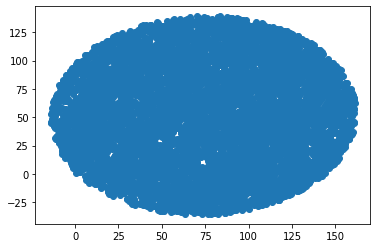

In [78]:
from astropy.wcs import WCS
all_xy = WCS(data.post_obj.header, naxis=2).all_world2pix(np.vstack([stars.RA, stars.Dec]).T, 1)
plt.scatter(*all_xy.T)
all_xy

In [76]:
pts = eleanor.use_pointing_model(all_xy.T, data.pointing_model[0])


array([[ 7.35238725e+01,  5.04411421e+01,  1.00000000e+00],
       [ 7.17637954e+01,  5.13834169e+01,  1.00000000e+00],
       [ 7.22209238e+01,  5.20721709e+01,  1.00000000e+00],
       ...,
       [-2.97018378e-01,  2.68902296e-02,  1.00000000e+00],
       [ 3.14541610e+01, -2.75739052e+01,  1.00000000e+00],
       [ 1.00758155e+01,  1.10719629e+02,  1.00000000e+00]])

&lt;matplotlib.collections.PathCollection at 0x7fc65fc57d00&gt;

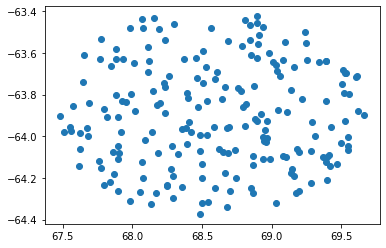

In [28]:
sources = data.post_obj.find_sources()
bright_sources = sources[sources["Tmag"] < 14]
plt.scatter(bright_sources["RA"], bright_sources["Dec"])

In [25]:
data.tpf

array([[[ 0.68029785,  0.09912872, -0.0524292 , ...,  4.0513077 ,
          7.9298325 ,  2.2437134 ],
        [ 0.7320633 ,  0.9748764 ,  0.70799255, ...,  3.4059448 ,
          3.2486877 ,  2.4348297 ],
        [ 0.39110565,  2.94207   ,  5.26548   , ...,  9.9116745 ,
          4.116417  ,  2.5989075 ],
        ...,
        [ 9.713684  ,  7.323784  ,  9.919556  , ...,  8.291664  ,
          4.2859344 ,  2.2242584 ],
        [ 7.577751  ,  4.0149307 ,  7.494774  , ...,  6.684059  ,
          8.125053  ,  6.2610703 ],
        [ 4.18425   ,  2.4545975 ,  3.3162537 , ...,  7.7099915 ,
         17.607872  , 20.678818  ]],

       [[ 0.24802399,  1.0060883 ,  0.34316254, ...,  4.7356033 ,
          7.5859146 ,  2.0131378 ],
        [ 1.1730194 ,  0.5859299 ,  0.68613434, ...,  4.061447  ,
          2.6922073 ,  2.227066  ],
        [ 0.33444214,  2.8539352 ,  5.2048416 , ...,  9.217255  ,
          4.789818  ,  2.1643448 ],
        ...,
        [ 9.882538  ,  7.4366455 , 10.395927  , ...,  

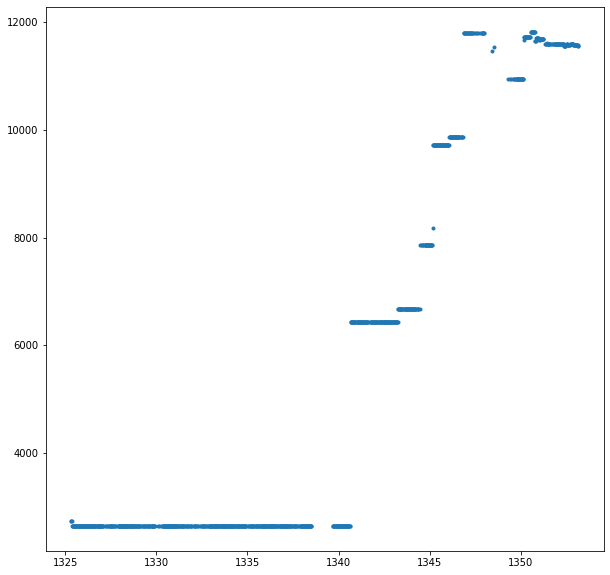

In [9]:
q = data.quality == 0
plt.figure(figsize=(10,10))
plt.plot(data.time[q], data.psf_flux[q], '.')

In [5]:
sc = lk.search_targetpixelfile(target='tic120362128', sector=14).download()
sq = sc.quality < 5000
start = 2500
end = 3400

In [9]:
data_m = copy.deepcopy(data)
data_z = copy.deepcopy(data)
data.psf_lightcurve(data_arr = sc.flux[sq][start:end], err_arr = sc.flux_err[sq][start:end], 
                        bkg_arr=sc.flux_bkg[sq,0,0][start:end], verbose=True, nstars=3, xc=[4.9, 4.5, 4.7], 
                        yc=[3.0, 4.4, 7.0], ignore_pixels=1)
#data_m.psf_lightcurve(data_arr = sc.flux[sq][start:end], err_arr = sc.flux_err[sq][start:end], 
#                        bkg_arr=sc.flux_bkg[sq,0,0][start:end], verbose=True, nstars=3, model='moffat', xc=[4.9, 4.5, 4.7],
#                        yc=[3.0, 4.4, 7.0], ignore_pixels=1)

100%|██████████| 900/900 [03:24<00:00,  4.41it/s]


In [ ]:
data_z.psf_lightcurve(data_arr = sc.flux[sq][start:end], err_arr = sc.flux_err[sq][start:end], 
                        bkg_arr=sc.flux_bkg[sq,0,0][start:end], verbose=True, nstars=3, model='zernike', xc=[4.9, 4.5, 4.7], yc=[3.0, 4.4, 7.0], ignore_pixels=1)

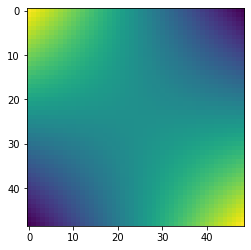

In [76]:
s = 49
zern = eleanor.models.Zernike((s,s),0,0)
x, y = zern.x - np.median(zern.x), zern.y - np.median(zern.y)
plt.imshow(zern.zernike(3).eval(session=sess) * (x ** 2 + y ** 2 < (s//2) ** 2))

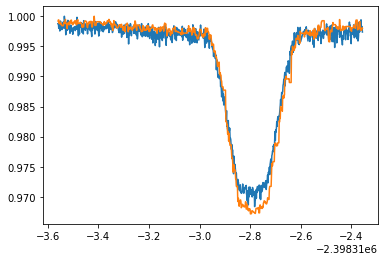

In [12]:
start_real = start+50
time = sc.time[sq][start_real:end].mjd - 2457000
photometry_flux = sc.to_lightcurve().flux[sq][start_real:end]
plt.plot(time, photometry_flux / np.max(photometry_flux), label='aperture photometry')
psf_flux = np.sum(data.all_psf, axis=1)
plt.plot(time, psf_flux[start_real-start:end-start] / np.max(psf_flux[start_real-start:end-start]))

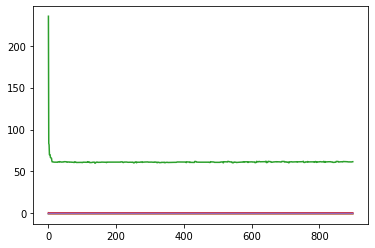

In [33]:
plt.plot(data.psf_params)

In [23]:
print(lk.estimate_cdpp(photometry_flux, transit_duration=1))
print(lk.estimate_cdpp(psf_flux, transit_duration=1))

779.2408751639736
630.4341126457117
